In [4]:
import numpy as np
import pkg_resources
#pkg_resources.require("opencv-python==3.4.2.16")
import cv2 as cv2
#from cv2.xfeatures2d import SIFT_create
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
%pylab inline
pylab.rcParams['figure.figsize'] = (12,12)

Populating the interactive namespace from numpy and matplotlib


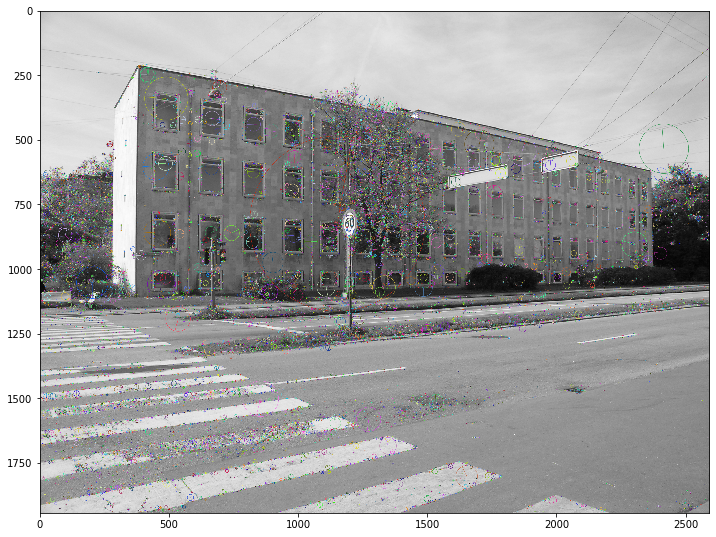

In [8]:
img = cv2.imread('Diku9.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
# kp,des = sift.detectAndCompute(gray, None)
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#subimg = img[1000:1600, 250:1100]
plt.imshow(img)
plt.show()

In [3]:
def SiftDetect(img):
    #gray = cv2.imread(img, 0)
    gray = img
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    
    img = cv2.drawKeypoints(gray,kp,np.empty_like(gray),(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    #retval = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    plt.imshow(img)
    plt.show()
    return gray, kp

In [5]:
def CornerDetect(img):
    image = cv2.imread(img, 0)
    #coords = corner_peaks(corner_harris(image), min_distance=1)
    coords = corner_peaks(cv2.cornerHarris(image,2,3,0.04), min_distance=1)

    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
            linestyle='None', markersize=6)
    #ax.plot(380, 212, '+r', markersize=15)
    plt.show()
    return image, coords

In [9]:
def BlobDetector(img):
    im = cv2.imread(img,0)
    # Set up the detector with default parameters.
    detector = cv2.SimpleBlobDetector_create()

    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.imshow(im_with_keypoints)
    plt.show()
    return im, keypoints

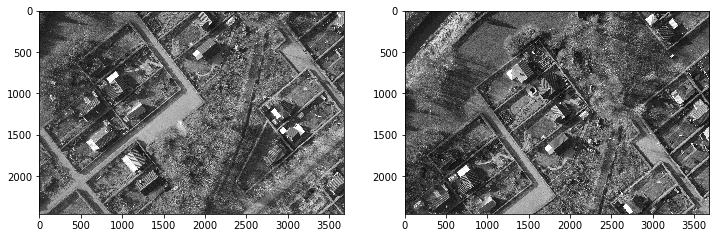

In [77]:
im1 = cv2.imread('im1red.png', 0)
im2 = cv2.imread('im2red.png', 0)
fig, ax = plt.subplots(1,2)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')


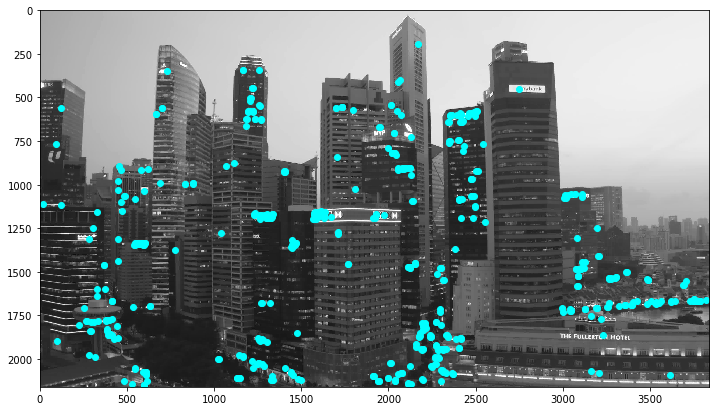

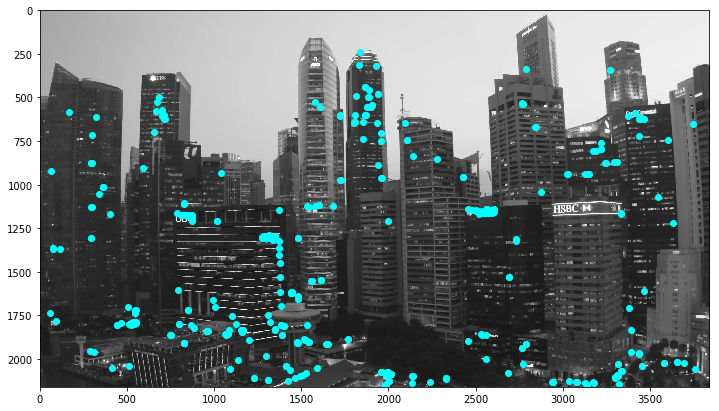

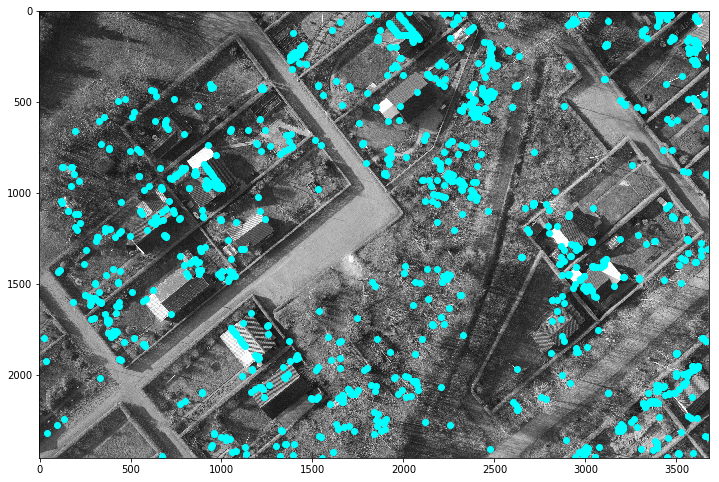

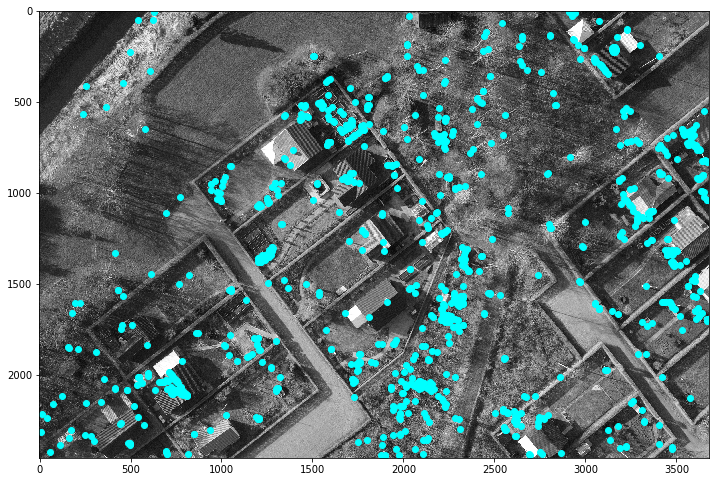

In [6]:
diku1 = cv2.imread('Diku1.jpg',0)
img = diku1[300:1000, 890:]
#img1, kp1 = SiftDetect(img)

diku2 = cv2.imread('Diku2.jpg',0)
img = diku2[450:1100, 450:2400]
#img2, kp2 = SiftDetect(img)
img3, kp3 = CornerDetect('skyline15.jpg')
img4, kp4 = CornerDetect('skyline205.jpg')

img5, kp5 = CornerDetect('im1red.png')
img6, kp6 = CornerDetect('im2red.png')

In [7]:
# Coords False for SiftDetect
# Coords True for CornorDetect

def ComputeMatches(img1, kp1, img2, kp2, n, coords=True):
    bestMatches = []
    matches = []
    print(img1.shape)
    x1_max, y1_max = img1.shape
    x2_max, y2_max = img2.shape
    for i in range(len(kp1)):
        # Create patch for fp one
        f1 = np.zeros((2 * n + 1, 2 * n + 1))
        if coords:
            x, y = kp1[i]
        else:
            x, y = kp1[i].pt
            x = int(x)
            y = int(y)
        for j in range(-n,n+1):
            for k in range(-n,n+1):
                if(x+j >= x1_max or x+j < 0 or y+k >= y1_max or y+k < 0):
                    continue
                f1[j+n,k+n] = img1[x + j, y + k]
        
        diss = []
        # For each kp in kp2        
        for l in range(len(kp2)):
            # Create patch for fp two
            f2 = np.zeros((2 * n + 1, 2 * n + 1))
            if coords:
                x, y = kp2[l]
            else:
                x, y = kp2[l].pt
                x = int(x)
                y = int(y)
            for j in range(-n,n+1):
                for k in range(-n,n+1):
                    if(x+j >= x2_max or x+j < 0 or y+k >= y2_max or y+k < 0):
                        continue
                    f2[j+n,k+n] = img2[x + j, y + k]
        
            # Calculate mean and standard deviations
            f1_bar = np.mean(f1)
            f2_bar = np.mean(f2)
            f1_hat = np.std(f1)
            f2_hat = np.std(f2)

            # Standardize
            f1 = f1 - f1_bar
            f1 = f1 / f1_hat
            f2 = f2 - f2_bar
            f2 = f2 / f2_hat
            
            # Calculate dissimilartiy
            d = np.sqrt(np.sum((f1 - f2)**2))
            diss.append(d)
        idx = argsort(diss)
        # Best and second best match
        match1 = [i, idx[0], diss[idx[0]]]
        match2 = [i, idx[1], diss[idx[1]]]
        bestMatches.append(match1)
        matches.append(match2)
    return bestMatches, matches

In [ ]:
n = 11
best1, second1 = ComputeMatches(img3, kp3, img4, kp4, n, coords=True)
#best2, second2 = ComputeMatches(image2, coords2, image1, coords1, n)

(2160, 3840)


In [56]:
# Only for Diku1 and Diku2
coords1 = np.array([[kp.pt[1] + 300, kp.pt[0] + 890] for kp in kp1]).astype(int)
coords2 = np.array([[kp.pt[1] + 450, kp.pt[0] + 450] for kp in kp2]).astype(int)

In [ ]:
# For Skyline images
matches = []
for i in range(len(best1)):
    #best1Match = best1[i][1]
    #best2Match = best2[best1Match][1]
     #if (best2Match == i):
         #matches.append([best2Match, best1Match])
    if (best1[i][2] / second1[i][2] <= 0.8) and (best1[i][2] < 12):
        matches.append([best1[i][0], best1[i][1]])

In [62]:
# For imred images
matches = []
for i in range(len(best1)):
    #best1Match = best1[i][1]
    #best2Match = best2[best1Match][1]
     #if (best2Match == i):
         #matches.append([best2Match, best1Match])
    if (best1[i][2] / second1[i][2] <= 0.7) and (best1[i][2] < 3):
        matches.append([best1[i][0], best1[i][1]])

In [73]:
# For Diku images
matches = np.empty([0,2])
for i in range(len(best1)):
    #best1Match = best1[i][1]
    #best2Match = best2[best1Match][1]
    #if (best2Match == i):
        #matches = np.append(matches, [[best2Match, best1Match]], axis=0).astype(int)
    if ((best1[i][2] / second1[i][2]) <= 0.7) and (best1[i][2] < 2):
        matches = np.append(matches, [[best1[i][0], best1[i][1]]], axis=0).astype(int)

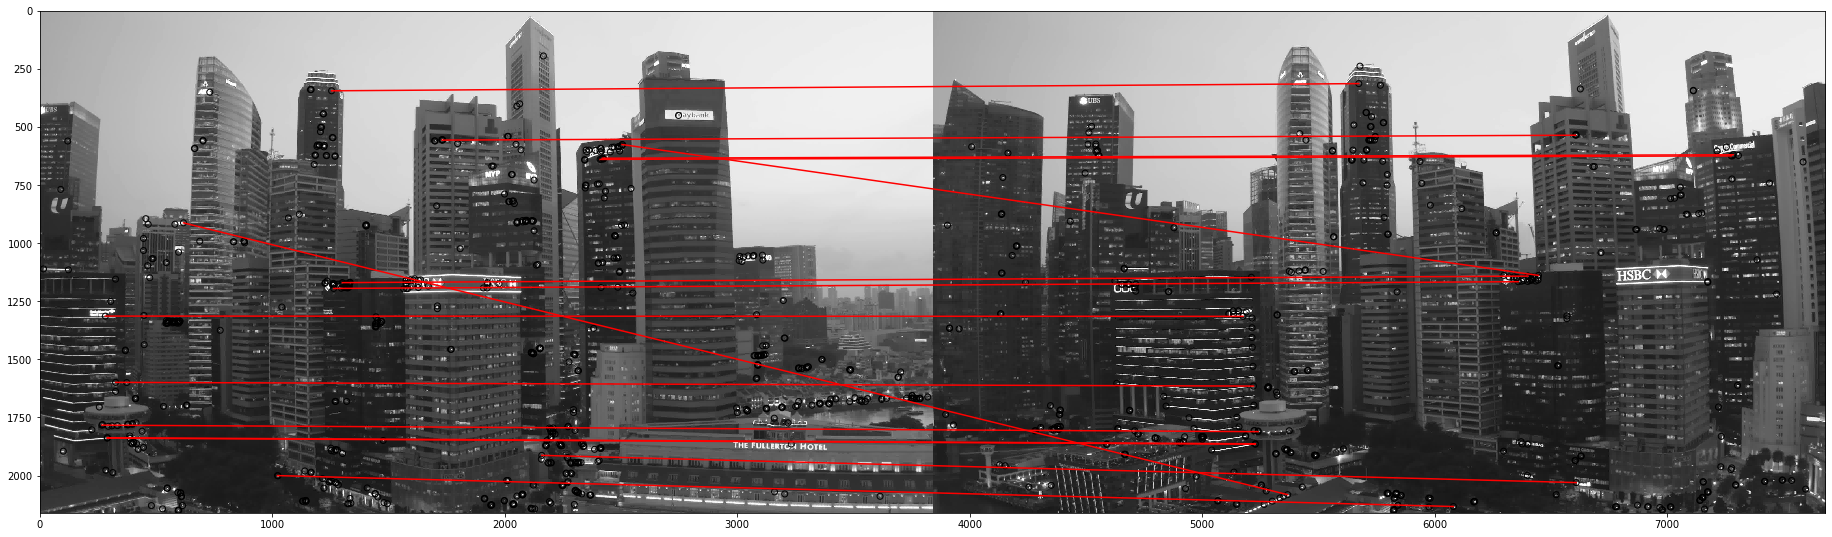

In [9]:
# n = 11, T = 12, R = 0.8
fig, ax = plt.subplots(1,1, figsize=(32,32))
skimage.feature.plot_matches(ax,img3,img4,kp3,kp4,np.asarray(matches), matches_color='r')
plt.show()

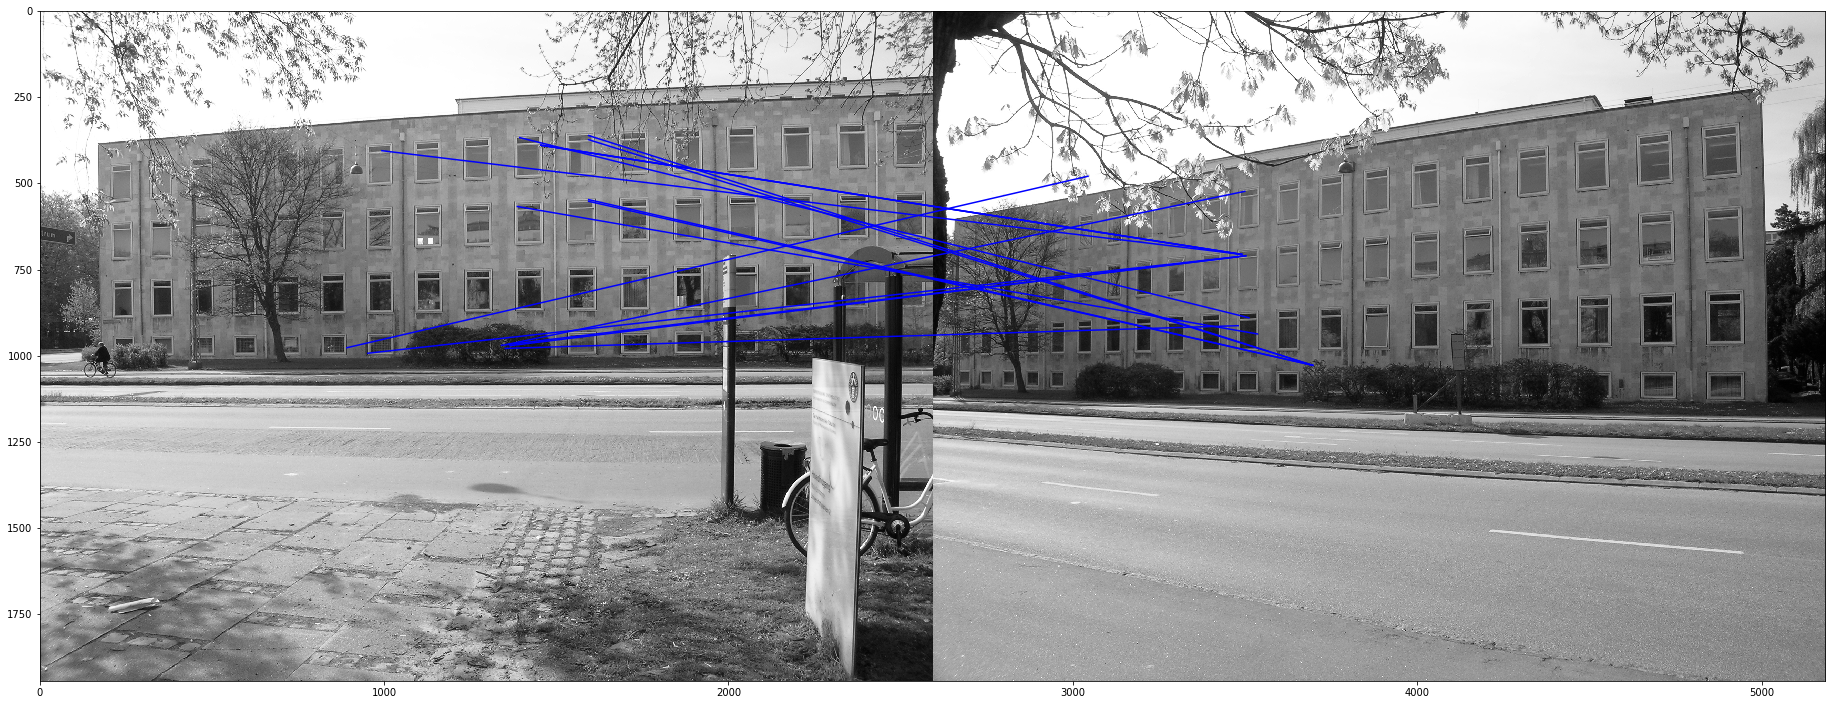

In [75]:
fig, ax = plt.subplots(1,1, figsize=(32,32))
skimage.feature.plot_matches(ax,diku1,diku2,coords1,coords2,matches,matches_color='b', only_matches=True, keypoints_color='b')
plt.show()

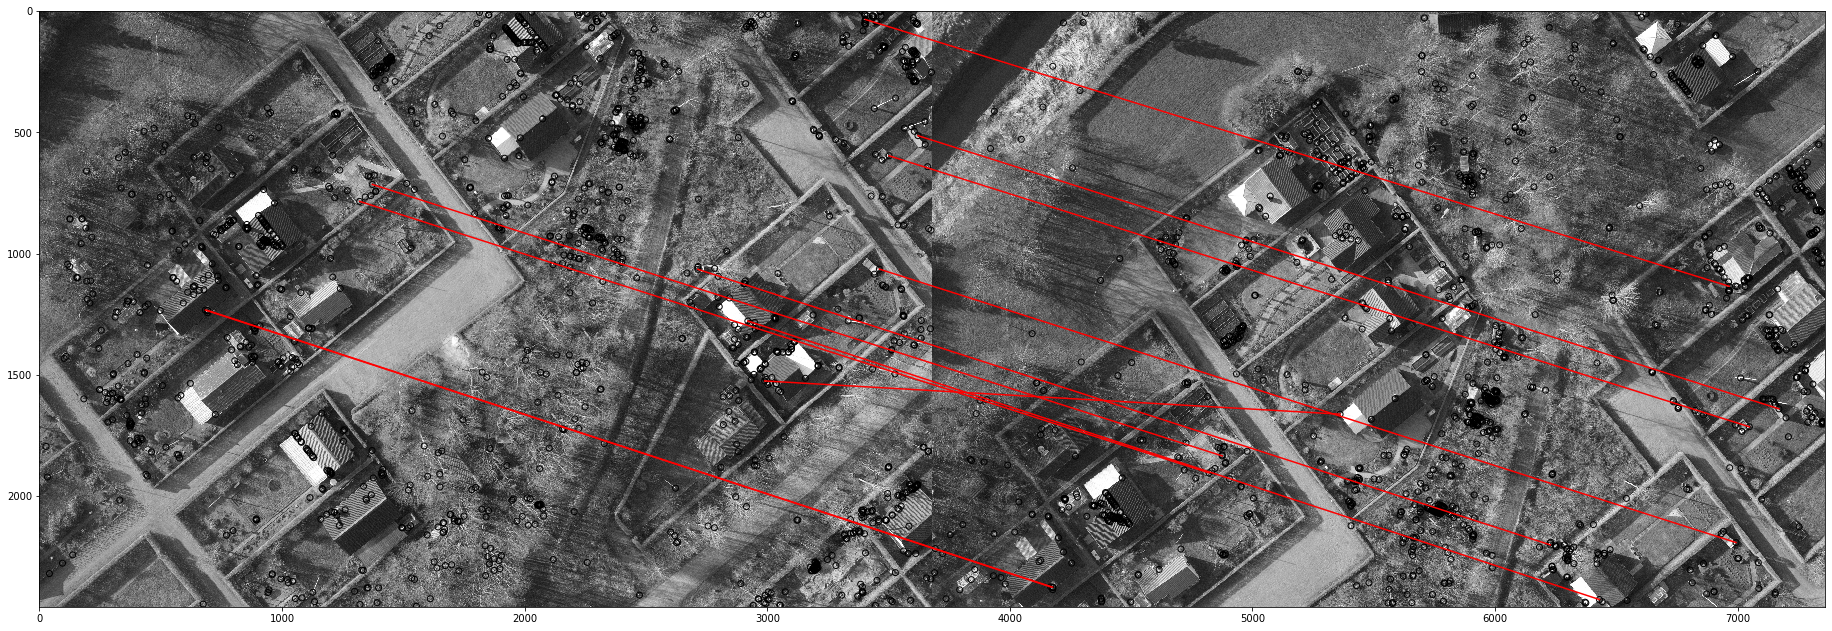

In [63]:
# n = 5, R = 0.7, T = 3
fig, ax = plt.subplots(1,1, figsize=(32,32))
skimage.feature.plot_matches(ax,img5,img6,kp5,kp6,np.asarray(matches), matches_color='r')
plt.show()

In [114]:
def ConstructPMatrix(matches, coords1, coords2):
    P = np.zeros((8,9))
    idxP = 0
    for i in range(2, 6):
        idx1, idx2 = matches[i]
        y1, x1 = coords1[idx1]
        y2, x2 = coords2[idx2]
        print('y1: {0}, x1: {1}, y2: {2}, x2: {3}'.format(y1, x1, y2, x2))
        
        #P[idxP] = [-x1, -y1, -1, 0, 0, 0, x1*x2, y1*x2, x2]
        P[idxP] = [x1, y1, 1, 0, 0, 0, -x1*x2, -y1*x2, -x2]
        idxP += 1
        
        #P[idxP] = [0, 0, 0, -x1, -y1, -1, x1*y2, y1*y2, y2]
        P[idxP] = [0, 0, 0, x1, y1, 1, -x1*y2, -y1*y2, -y2]
        idxP += 1
    return P

In [115]:
def DoHomography(src, H):
    print(src.shape)
    sizey, sizex = src.shape
    padding = 1500
    img = np.zeros((sizey + padding*2, sizex + padding*2))
    print(img.shape)
    for i in range(sizey):
        for j in range(sizex):
            hvec = np.dot(H, np.array([j, i, 1]).T)
            x = int(hvec[0] / hvec[2])
            y = int(hvec[1] / hvec[2])
            #print(hvec)
            
            img[y + padding][x + padding] = src[i][j]
    return img

In [116]:
P = ConstructPMatrix(matches, kp5, kp6)
U, S, V = np.linalg.svd(P)
#V = V.T
#H = V[-1].reshape(3,3)
L = V[-1,:] / V[-1,-1]
H = L.reshape(3,3)
H

y1: 597, x1: 3502, y2: 1714, x2: 3368
y1: 715, x1: 1372, y2: 1834, x2: 1195
y1: 785, x1: 1320, y2: 1904, x2: 1141
y1: 1064, x1: 3462, y2: 2191, x2: 3313


array([[ 9.72752651e-01, -3.14311750e-02, -1.33590468e+02],
       [-1.71133638e-02,  9.84810687e-01,  1.12809804e+03],
       [-9.45895475e-06, -1.09873548e-06,  1.00000000e+00]])

In [117]:
p1 = np.array([3621, 514, 1])
res = np.dot(H, p1)
y2 = res[0] / res[2]
y2

3494.245600959138

In [118]:
result = DoHomography(img6, H)

(2456, 3680)
(5456, 6680)


In [117]:
result = result.astype(int)
result.max()


130

<function matplotlib.pyplot.show(*args, **kw)>

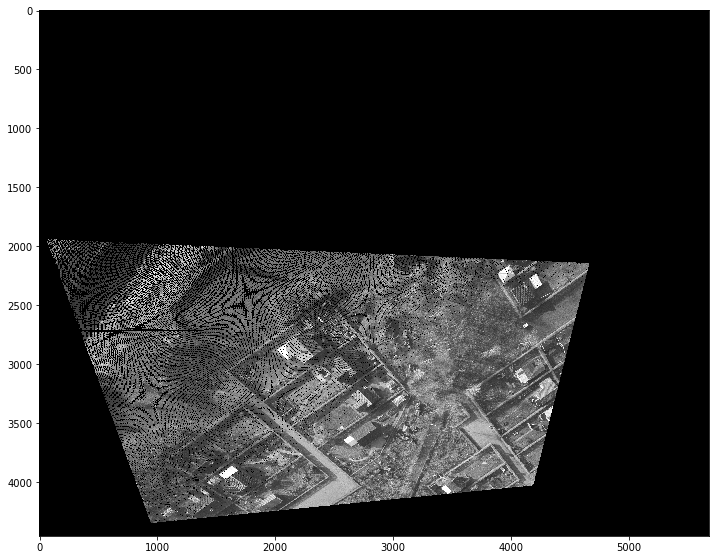

In [70]:
#zoom = result[1200:2400,2500:4680]
plt.imshow(result, cmap='gray')
plt.show

In [71]:
img1to2 = DoHomography(img5, H)

(2456, 3680)
(4456, 5680)


<function matplotlib.pyplot.show(*args, **kw)>

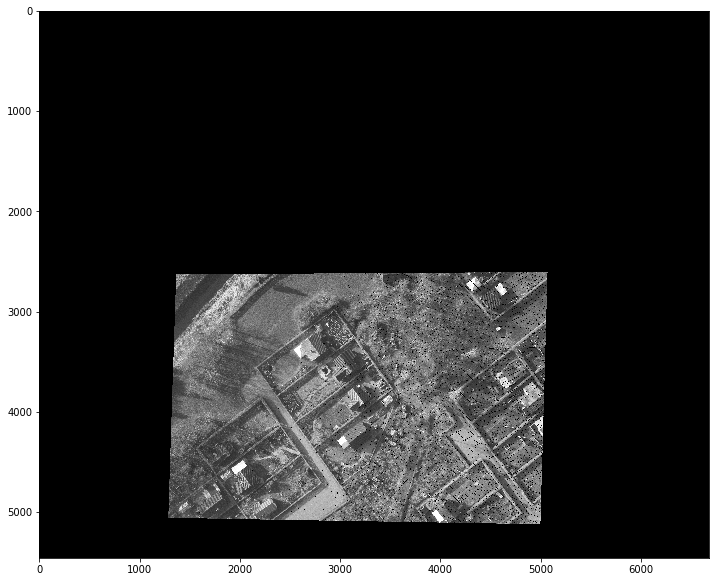

In [119]:
# n = 5, R = 0.7, T = 3, range = 2-6
plt.imshow(result, cmap='gray')
plt.show